In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

# remove warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

# my own module
from conf.configure import Configure
from utils import data_util

In [2]:
train = pd.read_csv(Configure.original_train_path)
test = pd.read_csv(Configure.original_test_path)

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def boxplot_sorted(df, by, column, target='median', ascending=True, rot=0):
    """ 按照从小到大的顺序绘制 boxplot 盒型图
    :param df: 待统计的 DataFrame
    :param by: 所要 groupby 统计的特征
    :param column: boxplot 的目标值
    :param target: 所要绘制数据的属性, mean median
    :param ascending: boxplot 绘制的顺序
    :param rot: 图标显示的角度
    :return: axes
    
    plt.figure(figsize=(18,8))
    axes = boxplot_sorted(train, 'feature', 'target_y')
    axes.set_title("Boxplot of sepal width by iris species")
    axes.set_ylim([6,200])
    """
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col: vals[column] for col, vals in df.groupby(by)})
    sorded_df = None
    if target == 'median':
        # find and sort the median values in this new dataframe
        sorded_df = df2.median().sort_values(ascending=ascending)

    if target == 'mean':
        # find and sort the median values in this new dataframe
        sorded_df = df2.mean().sort_values(ascending=ascending)

    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[sorded_df.index].boxplot(rot=rot, return_type="axes")


In [5]:
df2 = pd.DataFrame({col: vals['y'] for col, vals in train.groupby('X0')})
sorded_df = df2.median().sort_values(ascending=True)

In [6]:
feature_map = {k: v+1 for v, k in enumerate(sorded_df.index.values)}

for c in set(test['X0']):
    if c not in feature_map.keys():
        print c

ae
ag
an
av
bb
p


====== X0 ======


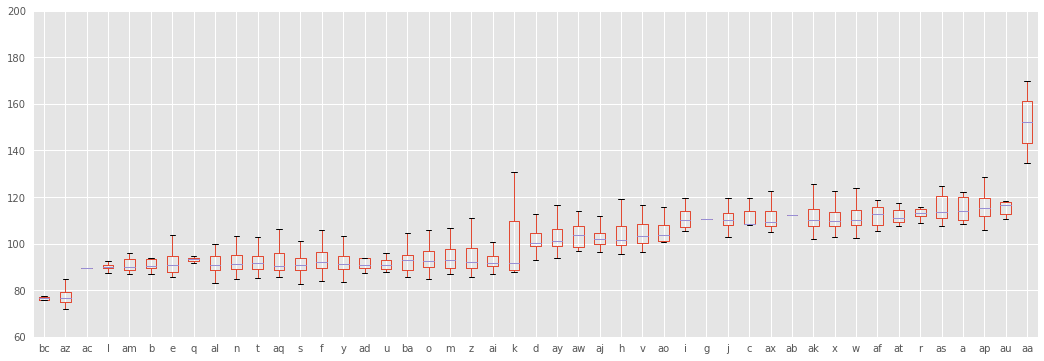

====== X1 ======


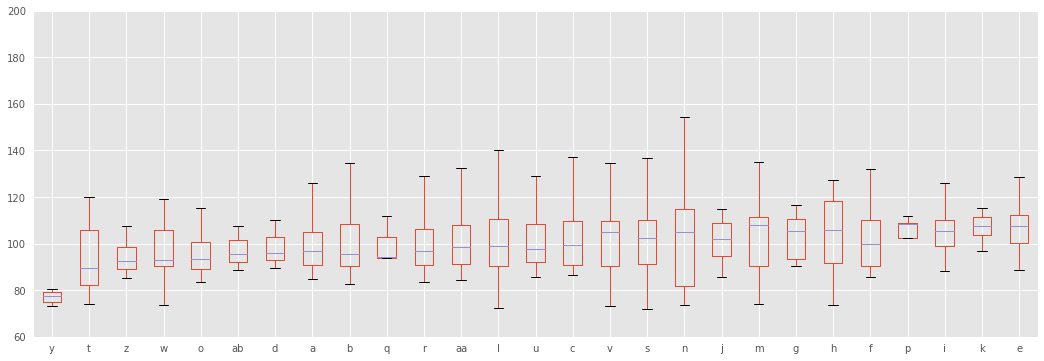

====== X2 ======


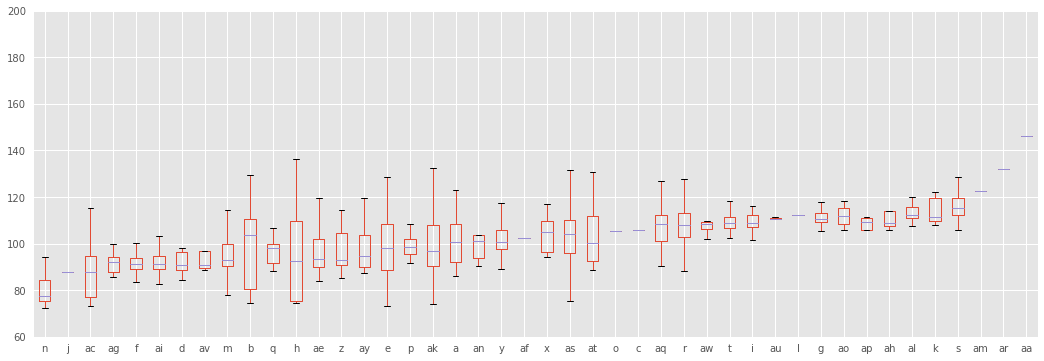

====== X3 ======


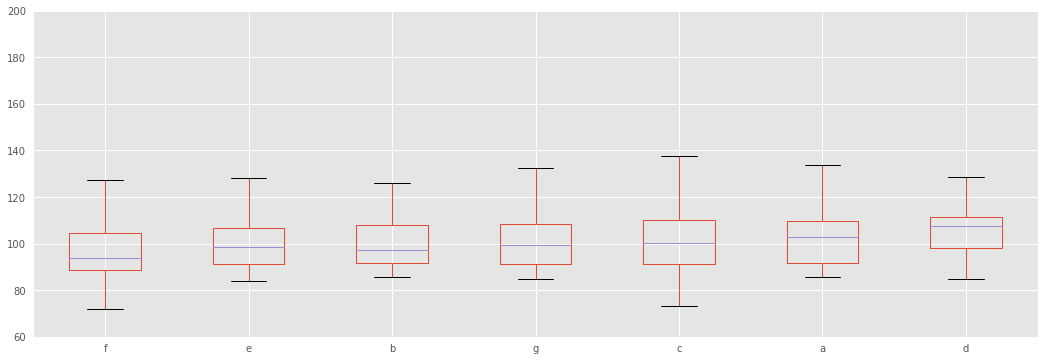

====== X4 ======


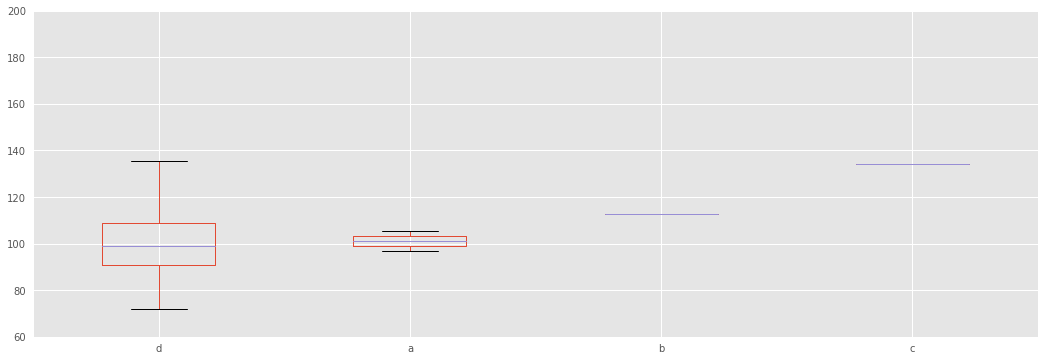

====== X5 ======


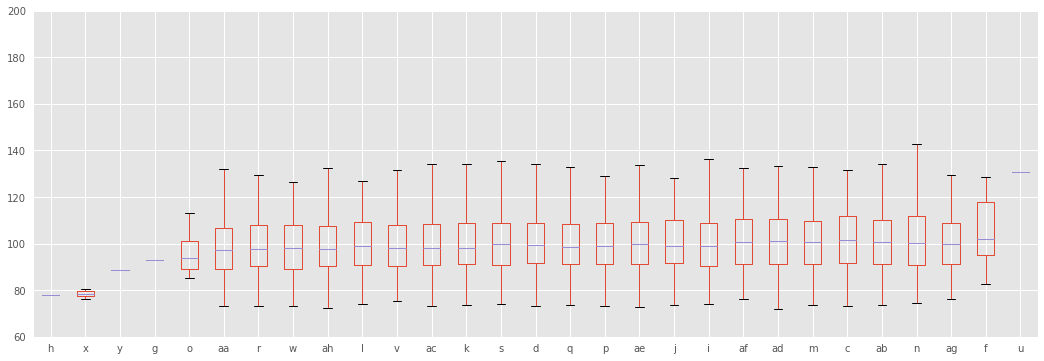

====== X6 ======


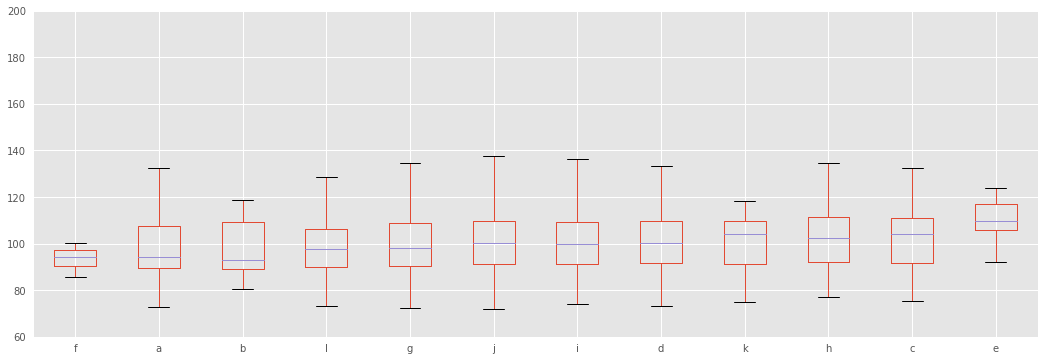

====== X8 ======


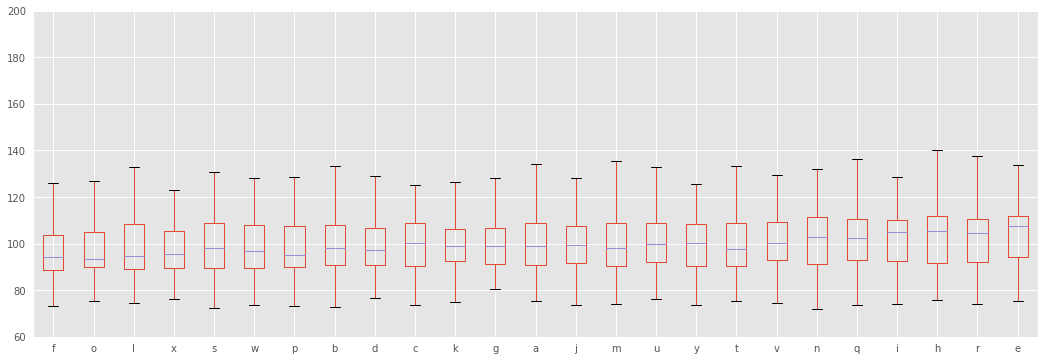

In [7]:
for c in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    print '======', c, '======'
    plt.figure(figsize=(18,6))
    axes = boxplot_sorted(train, c, 'y', target='mean')
    axes.set_ylim([60,200])
    plt.show()